Text(0.3, 0.3, '한글')

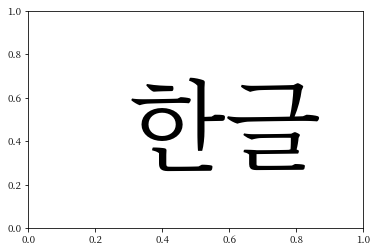

In [1]:
# 한글글꼴 경로 확인
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

import matplotlib
import matplotlib.pyplot as plt

# 근데 우분투 한글 기본 글꼴이 이거였어???
path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.text(0.3, 0.3, '한글', size=100)

# import sklearn

# #나눔 폰트를 사용합니다.
# matplotlib.rc('font', family='NotoSerifCJK-Regular')
# matplotlib.rcParams['axes.unicode_minus'] = False

# # imshow 함수로 흑백 이미지를 출력하기 위해
# plt.rcParams['image.cmap'] = "gray"
# plt.text(0.3, 0.3, '한글', size=100)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
logreg = LogisticRegression().fit(X_train, y_train)
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


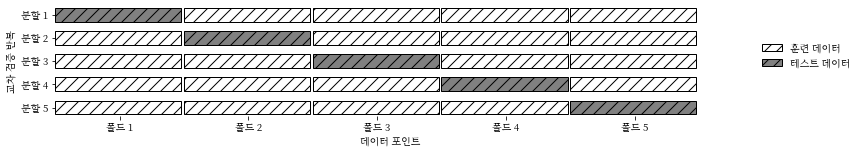

In [4]:
mglearn.plots.plot_cross_validation()

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차검증점수: ", scores)

교차검증점수:  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차검증점수: ", scores)

교차검증점수:  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [7]:
print("교차검증평균점수: {:.2f}".format(scores.mean()))

교차검증평균점수: 0.97


In [8]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.02050233, 0.02348232, 0.01724172, 0.02703118, 0.01860166]),
 'score_time': array([0.00054622, 0.00047612, 0.0004735 , 0.00049734, 0.00051045]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [9]:
res_df = pd.DataFrame(res)
res_df
print("평균 시간과 점수\n", res_df.mean())

평균 시간과 점수
 fit_time       0.021372
score_time     0.000501
test_score     0.973333
train_score    0.975000
dtype: float64


In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블:\n", iris.target)

iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


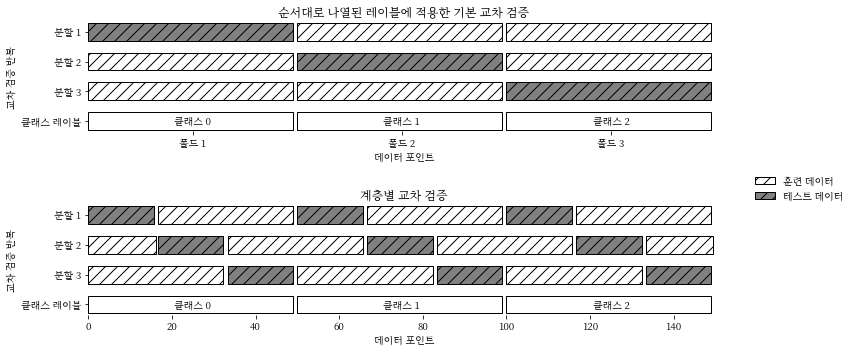

In [11]:
mglearn.plots.plot_stratified_cross_validation()

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("교차검증점수\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차검증점수
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [13]:
kfold = KFold(n_splits=3) # 이게 왜 결과가 0 0 0이 나오는지 잘 알겠지????
print("교차검증점수\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차검증점수
 [0. 0. 0.]


In [14]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차검증점수\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차검증점수
 [0.98 0.96 0.96]


In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차검증분할횟수\n", len(scores)) # 이게 결과가 150이 나오는데 이건 왜 이렇게 되는지 설명이 없네...
print("평균 정확도: {:.2f}".format(scores.mean()))

교차검증분할횟수
 150
평균 정확도: 0.97


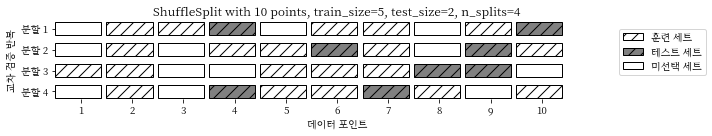

In [16]:
mglearn.plots.plot_shuffle_split()
# 10개의 데이터포인트에 train_size=5, test_size=2, n_splits=4
# 샘플이 10개인 데이터 셋을 5개의 훈련 세트, 2개의 테스트 세트, 4번 반복

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차검증점수\n", scores)

교차검증점수
 [0.97333333 0.94666667 0.94666667 0.94666667 0.96       0.98666667
 0.97333333 0.94666667 0.96       0.94666667]


In [18]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차검증점수\n", scores)

교차검증점수
 [0.75       0.6        0.66666667]


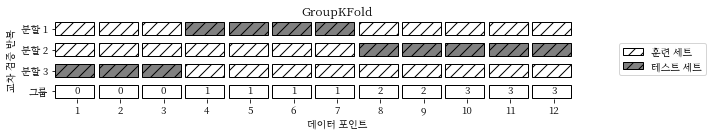

In [19]:
mglearn.plots.plot_group_kfold()

In [20]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print("교차검증점수\n", scores)
print("교차검증평균점수: {:.3f}".format(scores.mean()))

교차검증점수
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차검증평균점수: 0.965


In [22]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("훈련 세트의 크기: {}, 테스트 세트의 크기: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}
print("최고점수: {:.2f}".format(best_score))
print("최적매개변수:",  best_params)

훈련 세트의 크기: 112, 테스트 세트의 크기: 38
최고점수: 0.97
최적매개변수: {'C': 100, 'gamma': 0.001}


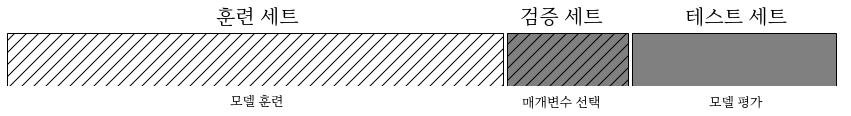

In [23]:
mglearn.plots.plot_threefold_split()

In [24]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("훈련세트의 크기: {} 검증세트의 크기: {} 테스트세트의 크기: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_params) # 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가한다???
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고점수: {:.2f}".format(best_score))
print("최적매개변수:",  best_params)
print("최적매개변수에서 테스트 세트 최고점수: {:.2f}".format(test_score))


훈련세트의 크기: 84 검증세트의 크기: 28 테스트세트의 크기: 38

검증 세트에서 최고점수: 0.96
최적매개변수: {'C': 10, 'gamma': 0.001}
최적매개변수에서 테스트 세트 최고점수: 0.92


In [25]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_params) # 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가한다???
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

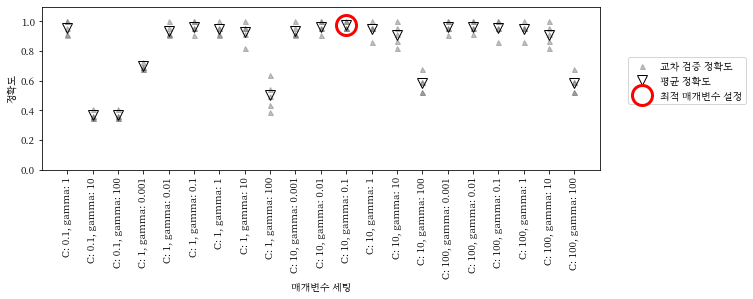

In [26]:
mglearn.plots.plot_cross_val_selection()

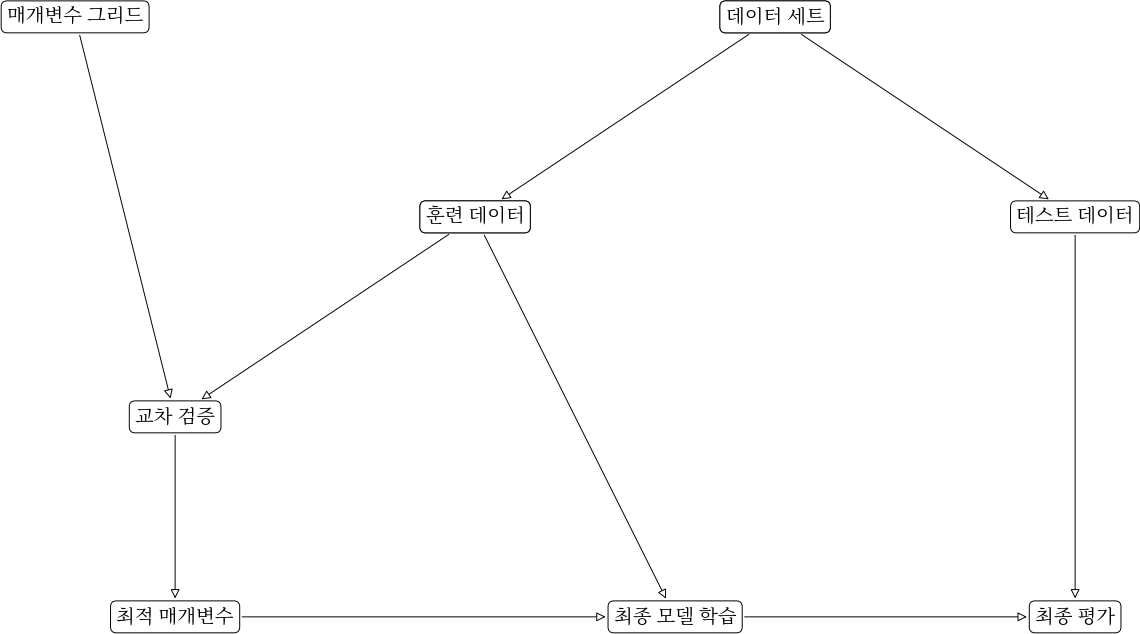

In [27]:
mglearn.plots.plot_grid_search_overview()

In [28]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드\n", param_grid)

매개변수 그리드
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [32]:
print("테스트세트점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트세트점수: 0.97


In [33]:
print("최적매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In [34]:
print("최고 성능 모델\n", grid_search.best_estimator_)

최고 성능 모델
 SVC(C=10, gamma=0.1)


In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.001553,0.001041,0.001054,0.001055,0.001083
std_fit_time,0.000954,0.000007,0.000005,0.000006,0.000014
mean_score_time,0.000597,0.000558,0.000561,0.00056,0.000558
std_score_time,0.000055,0.000006,0.000003,0.000005,0.000005
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


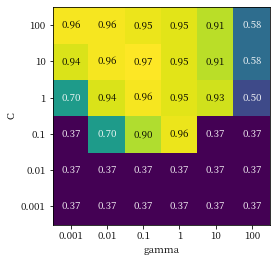

In [36]:
scores = np.array(results.mean_test_score).reshape(6,6)
# scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

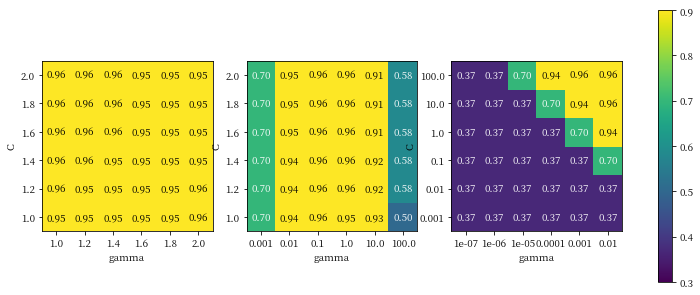

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis', ax=ax, vmin=0.3, vmax=0.9)
plt.colorbar(scores_image, ax=axes.tolist())

In [38]:
param_grid = [{'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
print('그리드목록\n', param_grid)

그리드목록
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [39]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [40]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00112,0.001038,0.001066,0.00107,0.001076,0.001128,0.001055,0.001033,0.001563,0.001178,0.001123,0.001309,0.001198,0.001189,0.001074,0.001157,0.001252,0.001409,0.001288,0.000901,0.000825,0.001,0.001295,0.001361,0.000856,0.000724,0.000721,0.000834,0.001258,0.001365,0.000746,0.000716,0.000695,0.000845,0.001261,0.001346,0.000953,0.000864,0.000746,0.000706,0.000702,0.00071
std_fit_time,0.000114,0.000018,0.000026,0.000058,0.000018,0.000049,0.000022,0.000013,0.000274,0.000221,0.000045,0.000121,0.000189,0.000189,0.000116,0.000335,0.000199,0.000285,0.000234,0.000037,0.000084,0.000217,0.000034,0.000036,0.000013,0.00001,0.000029,0.000016,0.000024,0.000047,0.00002,0.00003,0.000018,0.000024,0.000015,0.000022,0.000007,0.000002,0.000011,0.000011,0.000013,0.000029
mean_score_time,0.000591,0.000571,0.000568,0.000559,0.000561,0.000583,0.000561,0.000573,0.000827,0.000617,0.000576,0.00068,0.000684,0.000624,0.000671,0.000632,0.000628,0.000677,0.000731,0.000568,0.000537,0.000549,0.000597,0.00061,0.000538,0.000487,0.000483,0.000499,0.000549,0.000604,0.000498,0.000468,0.000467,0.000492,0.00055,0.000581,0.000508,0.000502,0.00048,0.000467,0.000456,0.000454
std_score_time,0.00004,0.000031,0.000018,0.000007,0.00001,0.000014,0.000013,0.00002,0.000207,0.000069,0.000019,0.000157,0.000201,0.00011,0.00014,0.000121,0.000089,0.000173,0.000162,0.000064,0.000054,0.000079,0.000055,0.000033,0.000023,0.000004,0.000017,0.000017,0.000003,0.000052,0.000013,0.000003,0.000003,0.000004,0.000006,0.000001,0.000006,0.000015,0.000009,0.000005,0.000003,0.000003
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel'

In [41]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("교차검증점수:", scores)
print("교차검증평균점수:", scores.mean())


교차검증점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차검증평균점수: 0.9800000000000001


In [42]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv 분할
    for training_samples, test_samples in outer_cv.split(X, y): # split()는 각 세트의 index를 반환한다는디요?
#         print('training_samples\n', training_samples) # training_samples의 index들 반환
#         print('test_samples\n', test_samples) # test_samples의 index들 반환
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            # inner_cv 분할
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증 평균
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체로 분류기 만들기
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트로 평가
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [43]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [{'kernel':['rbf'], 'C':loguniform(0.001, 100), 'gamma':loguniform(0.001, 100)}, {'kernel':['linear'], 'C':loguniform(0.001, 100)}]

In [45]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)
print("최적파라미터:", rand_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(rand_search.best_score_))

최적파라미터: {'C': 1.7965626423790642, 'kernel': 'linear'}
최고 교차 검증 점수: 0.97


In [46]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [{'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=1, random_state=42, n_jobs=-1)
halv_search.fit(X_train, y_train)
print()
print("최적파라미터:", halv_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(halv_search.best_score_))

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits

최적파라미터: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [47]:
print('자원리스트:', halv_search.n_resources_)
print('후보리스트:', halv_search.n_candidates_)

자원리스트: [30, 90]
후보리스트: [42, 14]


In [48]:
from sklearn.datasets import load_digits
digits=load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [49]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
# print(pred_most_frequent)
print("예측된 레이블:", np.unique(pred_most_frequent))
print("테스트 점수:{:.2f}".format(dummy_majority.score(X_test, y_test))) #그래 이렇게 90점을 얻는 건 사실 의미가 없는거지 머...

예측된 레이블: [False]
테스트 점수:0.90


In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트점수:{:.2f}".format(tree.score(X_test, y_test)))

테스트점수:0.92


In [51]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수:{:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수:{:.2f}".format(logreg.score(X_test, y_test)))


dummy 점수:0.82
logreg 점수:0.98


In [52]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("오차행렬\n", confusion)

오차행렬
 [[402   1]
 [  6  41]]


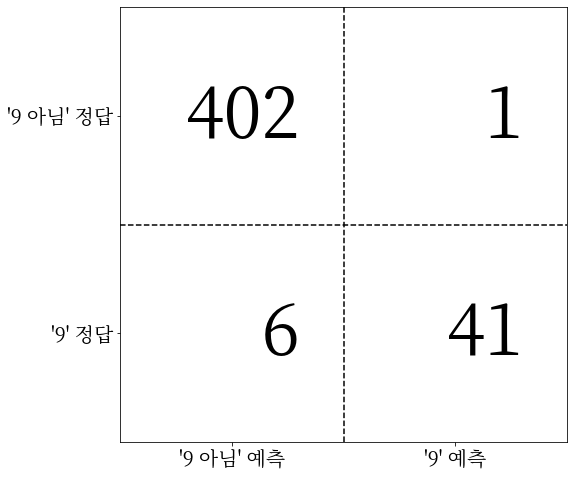

In [53]:
mglearn.plots.plot_confusion_matrix_illustration()

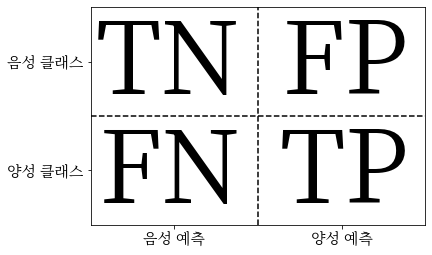

In [54]:
mglearn.plots.plot_binary_confusion_matrix()

In [55]:
print("빈도기반더미모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("무작위기반더미모델:")
print(confusion_matrix(y_test, pred_dummy))
print("결정트리:")
print(confusion_matrix(y_test, pred_tree))
print("선형회귀:")
print(confusion_matrix(y_test, pred_logreg))



빈도기반더미모델:
[[403   0]
 [ 47   0]]
무작위기반더미모델:
[[373  30]
 [ 43   4]]
결정트리:
[[390  13]
 [ 24  23]]
선형회귀:
[[402   1]
 [  6  41]]


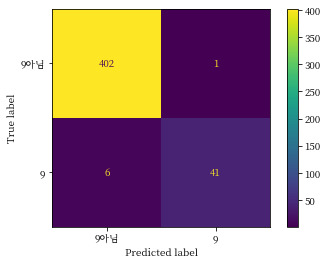

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['9아님', '9'])
plt.show()

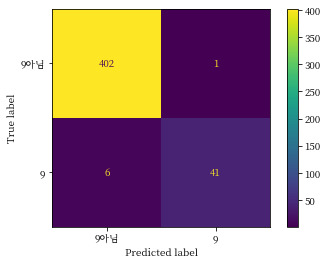

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=['9아님', '9'])
plt.show()

In [58]:
from sklearn.metrics import f1_score
print("빈도기반모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("선형회귀모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도기반모델의 f1 score: 0.00
무작위모델의 f1 score: 0.10
트리모델의 f1 score: 0.55
선형회귀모델의 f1 score: 0.92


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9아님', '9'], zero_division=0))
print(classification_report(y_test, pred_dummy, target_names=['9아님', '9']))
print(classification_report(y_test, pred_logreg, target_names=['9아님', '9']))

              precision    recall  f1-score   support

         9아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

              precision    recall  f1-score   support

         9아님       0.90      0.93      0.91       403
           9       0.12      0.09      0.10        47

    accuracy                           0.84       450
   macro avg       0.51      0.51      0.50       450
weighted avg       0.82      0.84      0.83       450

              precision    recall  f1-score   support

         9아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



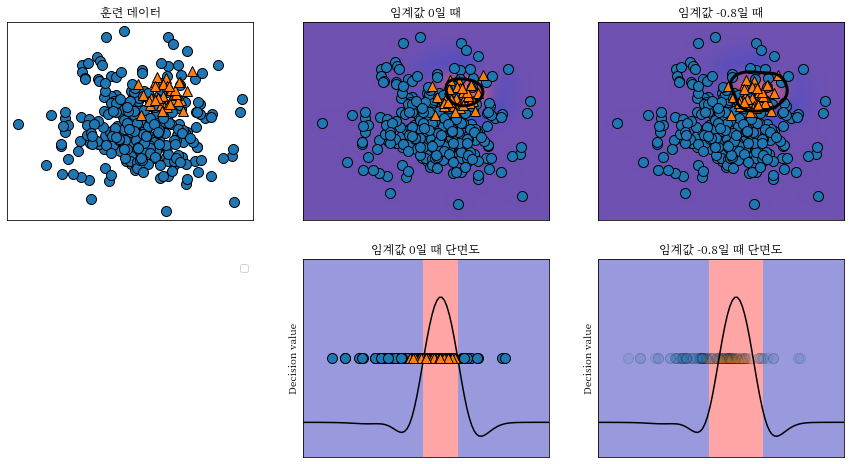

In [60]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
mglearn.plots.plot_decision_threshold()

In [61]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [62]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [63]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
print(thresholds)
close_zero = np.argmin(np.abs(thresholds))
print(close_zero)
# print(np.abs(thresholds))
print(thresholds[close_zero]) # 아마 얘가 0에 가장 가까운 임계값이겠지...

[-1.47090403 -1.44572917 -1.39761864 -1.387124   -1.34087674 -1.33291363
 -1.29378285 -1.26590436 -1.25711078 -1.23180696 -1.15545358 -1.15104651
 -1.1386043  -1.10114776 -1.09564958 -1.09560781 -1.09244855 -1.08797969
 -1.0861769  -1.08267667 -1.06221884 -1.06010122 -1.05818617 -1.05630237
 -1.03883369 -1.03679143 -1.03405525 -1.03205267 -1.02871902 -1.02857919
 -1.02852903 -1.02415268 -1.02388163 -1.02076344 -1.0164695  -1.01536282
 -1.01311932 -1.01170286 -1.01044247 -1.0102922  -1.01026633 -1.0084656
 -1.00840776 -1.00747736 -1.00609413 -1.00467053 -1.00385465 -1.00320657
 -1.0031964  -1.00283866 -1.00213323 -1.00148617 -1.0013854  -1.00121046
 -1.00119305 -1.00115386 -1.0010796  -1.00105363 -1.00097712 -1.00097537
 -1.00070245 -1.00058106 -1.00027441 -1.00023926 -1.00013144 -1.00003771
 -0.99981001 -0.9997917  -0.99973208 -0.99968788 -0.99918954 -0.99908802
 -0.99891055 -0.99882791 -0.99871026 -0.99828696 -0.99559099 -0.99557702
 -0.99238394 -0.99076097 -0.98779744 -0.98660479 -0.

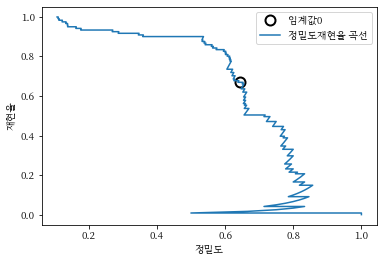

In [64]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
# print(close_zero)
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값0', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='정밀도재현율 곡선')
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

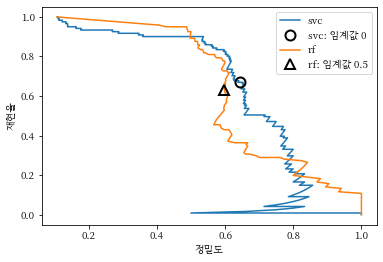

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1]) # RF는 decision_function()이 없다...

# rf.predict_proba(X_test)

# predict_proba는 출력이 0~1

# predict는 각각의 모델의 최종적인 예측값을 출력하는 결과인데요.
# 회귀 모델의 경우 0.98733...과 같이 구체적으로 특정 값을 출력하게 되고,
# 분류 모델의 경우 0, 1, 2와 같이 가장 확률이 높은 클래스를 출력하게 됩니다.
# 그리고 이때 분류 모델이 각 클래스에 대한 확률을 일일히 출력하는 것이 predict_proba 입니다.
# (predict_proba는 predict probability, 즉 각 클래스의 확률을 예측하라는 의미입니다)
# 따라서 회귀 모델에는 predict_proba를 사용할 수 없으며, 출력되는 값은 다음과 같습니다.
# [클래스가 3개인 문제를 풀 경우]
# Input -> [클래스 0일 확률, 클래스 1일 확률, 클래스 2일 확률]
# 당연히 여러 개의 input을 넣을 경우 그 input만큼의 각 클래스 확률을 출력하게 됩니다.
# 따라서 강의안에서 제시된 predict_proba[:,1]과 같은 방식은 이진분류 문제일 때,
# 회귀문제를 분류모델을 통해 푸는 방식을 뜻하며 이는 곧 1일 확률(&0이 아닐 확률)이기 때문에
# 이렇게 사용됩니다.

# array([[1.  , 0.  ],
#        [0.65, 0.35],
#        [0.3 , 0.7 ],
#        ...,
#        [1.  , 0.  ],
#        [1.  , 0.  ],
#        [1.  , 0.  ]])

# 앞에서 만든거
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="svc: 임계값 0", fillstyle="none", c="k", mew=2)

# rf
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5)) # 근디 여기 0.5를 빼는 이유가... predict_proba의 기본 임계값이 0.5
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)

plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [66]:
print("rf f1 score:{:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("svc f1 score:{:.3f}".format(f1_score(y_test, svc.predict(X_test))))

rf f1 score:0.610
svc f1 score:0.656


In [67]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("rf 평균 정밀도: {:.3f}".format(ap_rf))
print("svc 평균 정밀도: {:.3f}".format(ap_svc))

rf 평균 정밀도: 0.660
svc 평균 정밀도: 0.666


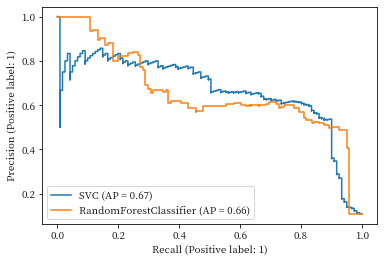

In [68]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

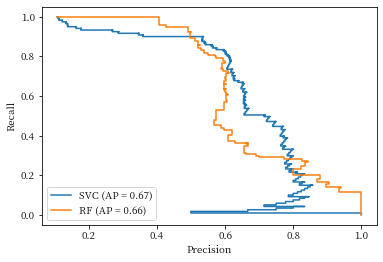

In [69]:
fig, ax = plt.subplots()
disp = PrecisionRecallDisplay(precision=recall, recall=precision, average_precision=ap_svc, estimator_name="SVC")
disp.plot(ax=ax)
disp = PrecisionRecallDisplay(precision=recall_rf, recall=precision_rf, average_precision=ap_rf, estimator_name="RF")
disp.plot(ax=ax)
ax.set(xlabel="Precision", ylabel="Recall")
plt.show()

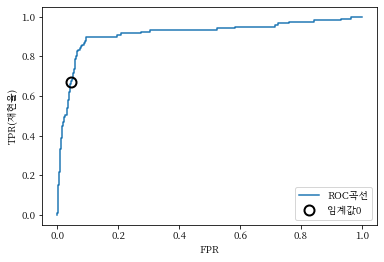

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC곡선")
plt.xlabel('FPR')
plt.ylabel('TPR(재현율)')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="임계값0", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

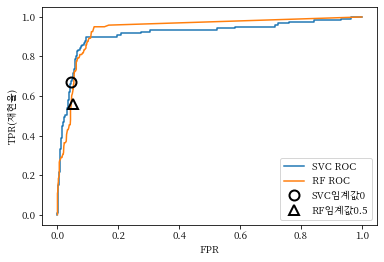

In [73]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="SVC ROC")
plt.plot(fpr_rf, tpr_rf, label="RF ROC")

plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="SVC임계값0", fillstyle="none", c="k", mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="RF임계값0.5", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

In [74]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("RF AUC: {:.3f}".format(rf_auc))
print("SVC AUC: {:.3f}".format(svc_auc))

RF AUC: 0.937
SVC AUC: 0.916


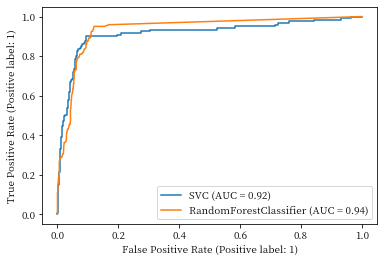

In [76]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

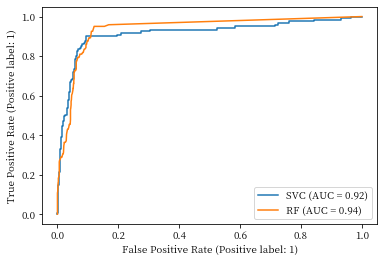

In [78]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name="SVC", ax=ax)
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:,1], name="RF", ax=ax)
plt.show()

gamma=1.00 정확도=0.90 AUC=0.50
gamma=0.10 정확도=0.90 AUC=0.96
gamma=0.01 정확도=0.90 AUC=1.00


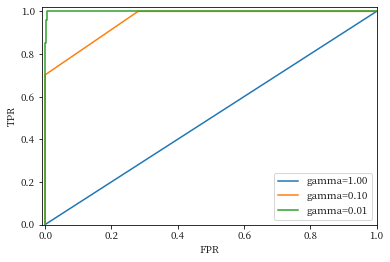

In [80]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma={:.2f} 정확도={:.2f} AUC={:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [84]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("confucion matrix:\n", confusion_matrix(y_test, pred))

accuracy: 0.953
confucion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


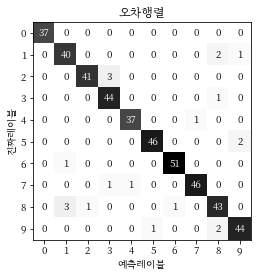

In [86]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel="예측레이블", ylabel="진짜레이블",
    xticklabels=digits.target_names, yticklabels=digits.target_names,
    cmap=plt.cm.gray_r, fmt="%d")
plt.title("오차행렬")
plt.gca().invert_yaxis()

In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [88]:
print("micro 평균 f1: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1: 0.953
macro 평균 f1: 0.954


In [90]:
print("기본 평가 지표: ", cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
print("정확도 지표: ", cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy", cv=5))
print("평균정밀도 지표: ", cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc", cv=5))

기본 평가 지표:  [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표:  [0.975      0.99166667 1.         0.99442897 0.98050139]
평균정밀도 지표:  [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [92]:
res = cross_validate(SVC(), digits.data, digits.target==9, scoring=["accuracy", "roc_auc", "recall_macro"], return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.025787,0.016363,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.025150,0.014503,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.024419,0.016518,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.019074,0.020205,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.017325,0.014314,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.976
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [95]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.988
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896
